<span style="font-family:Futura; font-size:3em; font-weight:light;">PyUltraLight 2 Advanced Visualiser Dev </span>

This notebook reproduces scenarios described in Section V of 

For a more comprehensive list of scenarios, and guidance on how to make your own, please use the Examples notebook shipped with the code.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Initialization" data-toc-modified-id="Initialization-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Initialization</a></span><ul class="toc-item"><li><span><a href="#Graphics" data-toc-modified-id="Graphics-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Graphics</a></span></li></ul></li><li><span><a href="#Getting-Ready" data-toc-modified-id="Getting-Ready-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Getting Ready</a></span><ul class="toc-item"><li><span><a href="#Base-Integrator-Settings" data-toc-modified-id="Base-Integrator-Settings-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Base Integrator Settings</a></span><ul class="toc-item"><li><span><a href="#All-supported-save-options:" data-toc-modified-id="All-supported-save-options:-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>All supported save options:</a></span></li></ul></li><li><span><a href="#Configuring-Soliton" data-toc-modified-id="Configuring-Soliton-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Configuring Soliton</a></span></li><li><span><a href="#Configuring-Particle" data-toc-modified-id="Configuring-Particle-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Configuring Particle</a></span></li><li><span><a href="#Initial-Conditions" data-toc-modified-id="Initial-Conditions-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Initial Conditions</a></span></li></ul></li><li><span><a href="#Compiling-Init-File" data-toc-modified-id="Compiling-Init-File-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Compiling Init File</a></span></li><li><span><a href="#Minimal-Analysis-Suite" data-toc-modified-id="Minimal-Analysis-Suite-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Minimal Analysis Suite</a></span><ul class="toc-item"><li><span><a href="#Loading-and-Conversion" data-toc-modified-id="Loading-and-Conversion-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Loading and Conversion</a></span></li><li><span><a href="#2D-Preview" data-toc-modified-id="2D-Preview-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>2D Preview</a></span></li><li><span><a href="#Energy" data-toc-modified-id="Energy-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Energy</a></span><ul class="toc-item"><li><span><a href="#Particle-Velocity" data-toc-modified-id="Particle-Velocity-4.3.1"><span class="toc-item-num">4.3.1&nbsp;&nbsp;</span>Particle Velocity</a></span></li></ul></li><li><span><a href="#Linear-Momentum" data-toc-modified-id="Linear-Momentum-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Linear Momentum</a></span></li><li><span><a href="#Angular-Momentum" data-toc-modified-id="Angular-Momentum-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Angular Momentum</a></span></li><li><span><a href="#2D-Complex-Field-Animation" data-toc-modified-id="2D-Complex-Field-Animation-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>2D Complex Field Animation</a></span></li><li><span><a href="#Dynamical-Timescale" data-toc-modified-id="Dynamical-Timescale-4.7"><span class="toc-item-num">4.7&nbsp;&nbsp;</span>Dynamical Timescale</a></span><ul class="toc-item"><li><span><a href="#Finding-Half-Radius" data-toc-modified-id="Finding-Half-Radius-4.7.1"><span class="toc-item-num">4.7.1&nbsp;&nbsp;</span>Finding Half Radius</a></span></li><li><span><a href="#Expected-Dynamical-Timescale" data-toc-modified-id="Expected-Dynamical-Timescale-4.7.2"><span class="toc-item-num">4.7.2&nbsp;&nbsp;</span>Expected Dynamical Timescale</a></span></li></ul></li><li><span><a href="#Standardized-Version-of-Dynamical-Timescale" data-toc-modified-id="Standardized-Version-of-Dynamical-Timescale-4.8"><span class="toc-item-num">4.8&nbsp;&nbsp;</span>Standardized Version of Dynamical Timescale</a></span><ul class="toc-item"><li><span><a href="#Another-way-to-find-C" data-toc-modified-id="Another-way-to-find-C-4.8.1"><span class="toc-item-num">4.8.1&nbsp;&nbsp;</span>Another way to find C</a></span></li></ul></li><li><span><a href="#Approximate-Method" data-toc-modified-id="Approximate-Method-4.9"><span class="toc-item-num">4.9&nbsp;&nbsp;</span>Approximate Method</a></span></li></ul></li></ul></div>

# Initialization

In [102]:
%reload_ext autoreload
%autoreload 2


###### Do not touch
MinVersion = 23

import PyUltraLight2 as PyUL

if (PyUL.S_version < MinVersion):
    raise RuntimeError("You need the latest PyULN!")

import numpy as np

np.set_printoptions(suppress=True)

import math

import numba
import numexpr as ne
import time
import pyfftw
import os
import sys
import multiprocessing
import numpy

from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec
import matplotlib.animation
from matplotlib.offsetbox import AnchoredText

import IPython
from IPython.display import clear_output, display, Video

from numpy import sqrt, exp, log, log10, sin, cos, tan, pi

# Shorthand for aux functions
ToCode = PyUL.convert
ToPhys = PyUL.convert_back
CB = PyUL.convert_between
printU = PyUL.printU
DefaultSolitonOrbit = PyUL.DefaultSolitonOrbit

## Graphics

In [103]:
plt.style.use('default')

plt.rcParams['font.family'] = 'DejaVu Serif'
plt.rcParams['mathtext.fontset'] = 'dejavuserif'
plt.rcParams["text.usetex"] = False
plt.rcParams['font.size'] = 18
plt.rcParams['axes.linewidth'] = 2
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['axes.facecolor'] = 'w'

from matplotlib.colors import LinearSegmentedColormap
Palette = 'magma'
cyccol = ['#000000', '#ffffff', '#000000']
divcol = ['#003262', '#005b96', '#ffffff', '#d5a756', '#B51700']
divcols = ['#005b96', '#ffffff', '#d5a756']

CycPalette = 'twilight'  #LinearSegmentedColormap.from_list('myCyc', cyccol)

DivPalette = LinearSegmentedColormap.from_list('myDiv', divcol)
DivPaletteS = LinearSegmentedColormap.from_list('myDiv', divcols)

EFigSize = (20, 12)
EFigSizeMono = (20, 6)
VideoSize = (8, 8)
FPS = 10
DPI = 72

FrameCap = -1  # Maximum Number of Frames to Animate

FPS = 10
# FrameCap = 120

########################################

# BH Trajectory

Colors = np.array([[209, 17, 65], [0, 177, 89], [0, 174, 219], [243, 119, 53],
                   [255, 196, 37]]) / 255

# NBody
ENStyle = '-'
ENColor = '#ff6c0e'  # NBody

EKColor = '#8dd9e7'
EPColor = '#fd8dc8'

# ULDM
EUStyle = '-'
EUColor = '#7f1717'  # ULDM

EQColor = '#ccb603'  # Kinetic
ERColor = '#6cc25c'  # Self-Interaction
EGColor = '#2c8899'  # Particle Potential

# Totals
ETStyle = '-'
ETColor = '#080808'

# Auxiliary
HelperStyle = 'k.'
EmphColor = 'black'
GeomColor = 'olivedrab'

# Getting Ready

## Base Integrator Settings

In [104]:
resol = 128

length, length_units = 4.5, 'kpc'  # Box Size
duration, duration_units = 200, 'Myr'  # Simulation duration

start_time = 0.  # For solitons only: Pre-evolve the wavefunction phase.

NS = 32

save_format = 'npy'  # now with support for npy and hdf5

step_factor = 1

save_number = 400

Num_Steps = PyUL.DispN(duration, duration_units, length, length_units, resol,
                       step_factor, save_number)

### All supported save options:

*The options text should not contain commas. Please separate options with a space.*

**Please Always Include**

    Energy NBody DF

**To save the entire grid (not recommended)**

    3Wfn
    
**To save ULDM densities**

    3Density 2Density 1Density
    
**To save ULDM gravitational fields**

    3Grav 2Grav 1Grav
    
**To save total gravitational fields**

    3GravF 2GravF 1GravF
    
**To save phase in the x-y plane**

    2Phase

**Bonus features**

    Entropy 
(saves the sum of ρlogρ)
    
    AngMomentum
(with respect to origin, time-consuming)
    
    Momentum
(very time-consuming)
    
    

***Bonus Memory Saver ***

    Save_Options = "Minimum"
    
This will be automatically translated to 
    
    Energy 1Density NBody DF Entropy

In [105]:
# You can also set it to 'Minimum' to only save all 1D mesh Data.
Save_Options = 'Energy NBody DF 2Density 2Grav 2Phase 3WfnRS ULDCOM'

#This Boolean List is for program's internal use
save_options = PyUL.SaveOptionsDigest(Save_Options)

## Configuring Soliton

0.012897957912256707

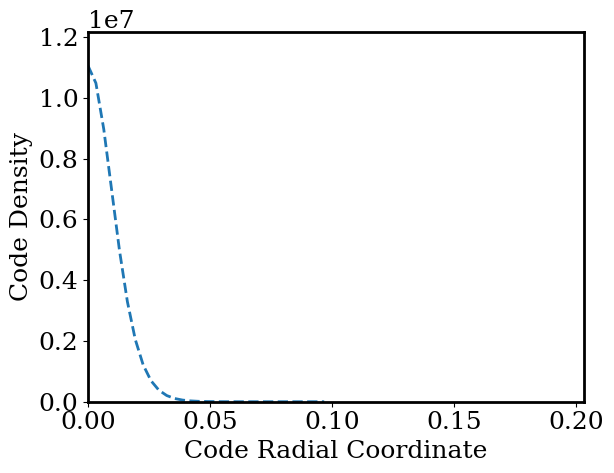

In [107]:
s_mass_unit = 'M_solar_masses'
s_position_unit = length_units
s_velocity_unit = 'km/s'

mS = 12  # User Input
Phase = 0  # Multiples of pi

PyUL.SolitonSizeEstimate(mS,
                         length,
                         resol,
                         s_mass_unit,
                         length_units,
                         Plot=True)

## Configuring Particle

In [108]:
gridspace = PyUL.MeshSpacing(resol, length, length_units, silent=False)
# PLUMMER RADIUS (IN LENGTH UNITS)
rP = gridspace / 2

a = PyUL.GenPlummer(rP, length_units)

mP = 0.08 * mS  # User Input

m_mass_unit = s_mass_unit
m_position_unit = s_position_unit
m_velocity_unit = s_velocity_unit

PyUL.Mesh: Each grid spacing is 0.035kpc, this is 35.156pc.


## Initial Conditions

ULDM system mass within is 3.195 M_solar_masses
Circular orbit velocity is 9.906 km/s


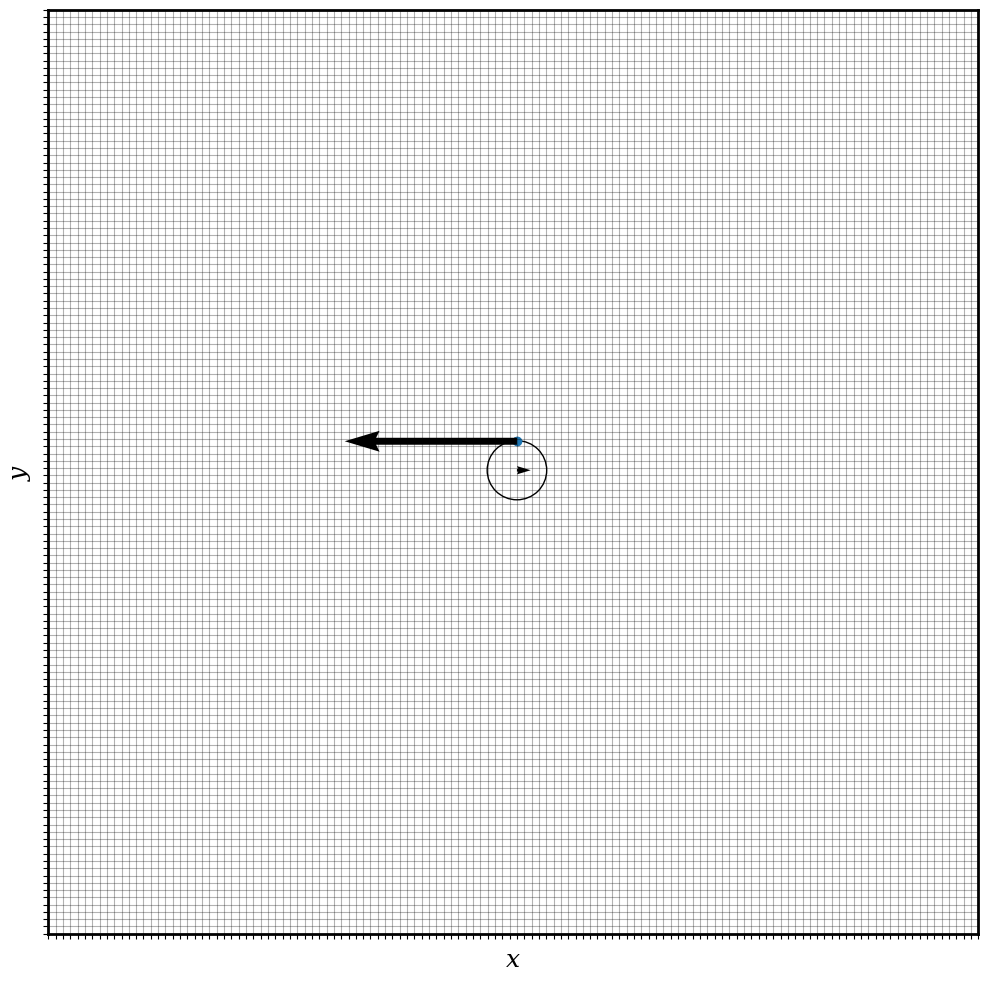

In [160]:
Radius = 0.14  # Impact Parameter. In Grid Length Units.

Separation = 0  # Same unit as position.


MIn, vRel0 = DefaultSolitonOrbit(resol, length, length_units, mS,
                                      s_mass_unit, Radius, m_position_unit,
                                      m_velocity_unit)

print(f'ULDM system mass within is {MIn:.3f} {s_mass_unit}')
print(f'Circular orbit velocity is {vRel0:.3f} {m_velocity_unit}')

#================================================================
# Do not touch

M = mS + mP
# Unit 1
y1 = Separation * mS / M
x1 = Radius * mS / M
yDot1 = vRel0 * mS / M

# Unit 2
y2 = Separation * mP / M
x2 = Radius * mP / M
yDot2 = vRel0 * mP / M

embeds = []

particles = [[mP, [x1, y1, 0], [0, -yDot1, 0]]]
solitons = [[mS, [-x2, -y2, 0], [0, yDot2, 0], Phase * np.pi]]

plt.show()

Uniform = False  # if True, then there won't be solitons.
Density = 0
UVel = [0, 0, 0]  # Uses s_velocity_units
density_unit = ''  # Accepted units: 'MSol/pc3', 'kg/m3', and '' for dimensionless units

fig, ax = PyUL.VizInit2D(length, length_units, resol, embeds, solitons,
                         s_position_unit, s_mass_unit, particles,
                         m_position_unit, Uniform, Density, density_unit, rP,
                         vRel0 * 5)

[**Back to the Top**](#root)
<a id='run'></a>
# Compiling Init File

This creates a timestamped folder using the current settings, and the integrator stores all requested files in it too.

In [161]:
save_path = 'Single_Tests'

PyUL.DSManagement(save_path, Force = False)

[ Single_Tests ] : The current size of the folder is 1760.671 Mib
[ Single_Tests ] : Do You Wish to Delete All Files Currently Stored In This Folder? [Y] 

Y
Folder Cleaned! 

[ Single_Tests ] : Save Folder Created.


In [162]:
Name = ''  # Name of the run. If blank you will be prompted to name it later

InitPath = ''  # Path to the pre-compiled wavefunction file. Skip the '.npy' extension when using.

run_folder = PyUL.GenerateConfig(
    NS, length, length_units, resol, duration, duration_units, step_factor,
    save_number, Save_Options, save_path, save_format, s_mass_unit,
    s_position_unit, s_velocity_unit, solitons, start_time, m_mass_unit,
    m_position_unit, m_velocity_unit, particles, embeds, Uniform, Density,
    density_unit, a, UVel, False, Name)

PyUL.evolve(
    save_path,
    run_folder,
    EdgeClear=False,  # Reflexive Boundary Condition (Half Baked)
    DumpInit=False,  # Dump Initial Wavefunction
    DumpFinal=False,  # Dump Final Wavefunction
    UseInit=False,  # Use Initial Wavefunction (Specify in InitPath)
    IsoP=False,  # Use Zero Padded Potential
    UseDispSponge=False,  # Dispersive Sponge Boundary Condition
    SelfGravity=True,  # ULDM Feels Own Gravity
    NBodyInterp=True,  # N body Particle Feels ULDM Gravity
    NBodyGravity=True,  # ULDM Feels N body Gravity
    Silent=False,  # Quiet Mode
    AutoStop=False,  # Stop simulation with BH
    AutoStop2=
    False,  # Stop when ULDM gravitational field strength becomes unstable by
    WellThreshold=100,  # this much.
    InitPath=InitPath,  # 
    InitWeight=
    1,  # Blend factor of loaded Wavefunction (Set InitWeight to -1 to utilize the phase only)
    Stream=False,  # Write RK Step Results To File (Not Used)
    StreamChar=[1, 4],
    CenterCalc=True,
    Length_Ratio = 0.5, 
    resolR = 64,
)  # Locations in the vectorized TMState to Stream. (x-y flipped).

import IPython

IPython.display.Audio("Done.mp3", autoplay=True)

What is the name of the run? Blank to use generated timestamp. ABORT to cancel compilation.
Dx1
PyUL. Sys: ('Compiled Config in Folder', 'Dx1')
PyUL. FFT: Using 10 CPU Threads for FFT.
PyUL.27.0: (c) 2020 - 2021 Wang., Y. and collaborators. 
Auckland Cosmology Group

Original PyUltraLight Team:
Edwards, F., Kendall, E., Hotchkiss, S. & Easther, R.
arxiv.org/abs/1807.04037
PyUL.  IO: Loaded Parameters from ./Single_Tests/Dx1
PyUL.  IO: Data to save this run:
2Density Energy NBody 2Grav DF 2Phase 3WfnRS ULDCOM 
PyUL.NBody: Using Linear Interpolation for gravity.
PyUL. FFT: Simulation grid resolution is 128^3.
==========================Additional Settings=================================
Particle gravity  ON.
ULDM self-gravity  ON.
NBody response to ULDM  ON.
==========================Stopping Conditions=================================
PyUL.Init: Loaded standard soliton radial profile.
PyUL.Scaler: Using scale 1
PyUL.  SP: Poisson Equation Solveed Using FFT.
PyUL.NBody: Particle #0 mass 

# Minimal Analysis Suite

## Loading and Conversion

In [163]:
Load2D = True  # Load your 2D Output data
Load1D = False  # Load your 1D Output data

############################################

run_folder = PyUL.Runs(save_path)

loc = './' + save_path + '/' + run_folder
TimeStamp = run_folder
# Reload Config.. Why don't I use a class?
NS, length, length_units, resol, duration, duration_units, step_factor, save_number, save_options, save_format, s_mass_unit, s_position_unit, s_velocity_unit, solitons, start_time, m_mass_unit, m_position_unit, m_velocity_unit, particles, embeds, Uniform, Density, density_unit, a, UVel = PyUL.LoadConfig(
    loc)

if save_number == -1:
    sim_number = PyUL.ULDStepEst(duration,
                                 duration_units,
                                 length,
                                 length_units,
                                 resol,
                                 step_factor,
                                 save_number=-1)
else:
    sim_number = save_number

# Dict of Run Data
EndNum, Loaded = PyUL.Load_npys(loc, save_options, LowMem=False, Extension = save_format)

if Load2D:
    phasedata = Loaded['2Phase']
    phidata = Loaded['2Grav']
    #phidataF = Loaded['2GravF']
    data = Loaded['2Density']
    

if Load1D:
    #phi1D  = Loaded['1Grav']
    phiF1D = Loaded['1GravF']
    linedata = Loaded['1Density']

TMdata = Loaded['NBody']
UCdata = Loaded['ULDCOM']
graddata = Loaded['DF']

NBo = len(particles)

ToCode = PyUL.convert
ToPhys = PyUL.convert_back
CB = PyUL.convert_between

# Time
durationMyr = CB(duration, duration_units, 'Myr', 't')

# Space
lengthKpc = CB(length, length_units, 'kpc', 'l')
lengthC = ToCode(length, length_units, 'l')

# Mass

MassList_MSol = []
MassListSI = []
for TM in particles:
    MassList_MSol.append(CB(TM[0], m_mass_unit, 'M_solar_masses', 'm'))
    MassListSI.append(CB(TM[0], m_mass_unit, 'kg', 'm'))

# Density
DensitySI = CB(Density, density_unit, 'kg/m3', 'd')
DensityC = ToCode(Density, density_unit, 'd')

## Misc. Pre-Multipliers

Tp = np.arange(EndNum)
Tp = Tp * durationMyr / (sim_number + 1)

# NBody_State Vector

XPre = ToPhys(1, 'kpc', 'l')
VPre = ToPhys(1, 'km/s', 'v')

XPreSI = ToPhys(1, 'm', 'l')
VPreSI = ToPhys(1, 'm/s', 'v')

IArray = np.arange(len(TMdata[0]))

# Dimensionful NBody State

TMDataS = np.array(TMdata)
TMDataSI = np.array(TMdata)

UCDataS = np.array(UCdata)
UCDataSI = np.array(UCdata)

TMDataS[:, IArray % 6 <= 2] *= XPre
TMDataS[:, IArray % 6 >= 3] *= VPre

TMDataSI[:, IArray % 6 <= 2] *= XPreSI
TMDataSI[:, IArray % 6 >= 3] *= VPreSI


UCDataS *= XPre
UCDataSI *= XPreSI

# Rho data
DPre = CB(1, density_unit, 'kg/m3', 'd')

# Energy
EPre = PyUL.energy_unit

# Field Strength
PPre = PyUL.mass_unit / PyUL.length_unit

# Momentum
pPreSI = PyUL.mass_unit * VPreSI

# Angular Momentum
LPreSI = pPreSI * PyUL.length_unit

if save_options[18]:
    i = 0
    pData = []
    Success = True

    while Success:

        try:
            pData.append(pPreSI * np.load(f'{loc}/Outputs/PMT_#{i:03d}.npy'))
            i += 1
        except:
            Success = False

if save_options[19]:
    i = 0
    LData = []
    Success = True

    while Success:

        try:
            LData.append(LPreSI * np.load(f'{loc}/Outputs/MVR_#{i:03d}.npy'))
            i += 1
        except:
            Success = False

print('Unit conversion ready!')

print("==============================================")
print(f"PyULN: Axion Mass Used is {PyUL.axion_E} eV.\n")

print(f"\
1 Mass Unit    = {PyUL.mass_unit:.5g} kg = {PyUL.convert_back(1,'solar_masses','m'):.4g} MSol\n\
1 Length Unit  = {PyUL.length_unit:.5g} m  = {PyUL.convert_back(1,'kpc','l'):.4g} kpc\n\
1 Time Unit    = {PyUL.time_unit:.5g} s  = {PyUL.convert_back(1,'Myr','t')/1000:.4g} Gyr\n\n\
1 Density Unit = {PyUL.mass_unit/PyUL.length_unit**3:.5g} kg/m^3 = {PyUL.mass_unit/PyUL.length_unit**3/PyUL.CritDens} Critical Density\n\
1 Speed Unit   = {PyUL.length_unit/PyUL.time_unit:.5g} m/s\n\
1 Energy Unit  = {EPre:.5g} Joules\n")

Loaded = {}

PyUL. Dx1: Loading Folder
[1]: *Dx1
PyUL.  IO: 3D saves are not automatically loaded. Please load them manually.
['2Density', 'Energy', 'NBody', '2Grav', 'DF', '2Phase', 'ULDCOM']
PyUL.Loader: Loaded 401 Data Entries from ./Single_Tests/Dx1
Unit conversion ready!
PyULN: Axion Mass Used is 1.2e-21 eV.

1 Mass Unit    = 1.0661e+35 kg = 5.36e+04 MSol
1 Length Unit  = 3.4177e+20 m  = 11.08 kpc
1 Time Unit    = 2.3694e+18 s  = 75.13 Gyr

1 Density Unit = 2.6705e-27 kg/m^3 = 0.3100000000000001 Critical Density
1 Speed Unit   = 144.24 m/s
1 Energy Unit  = 2.2181e+39 Joules



## 2D Preview

<Figure size 640x480 with 0 Axes>

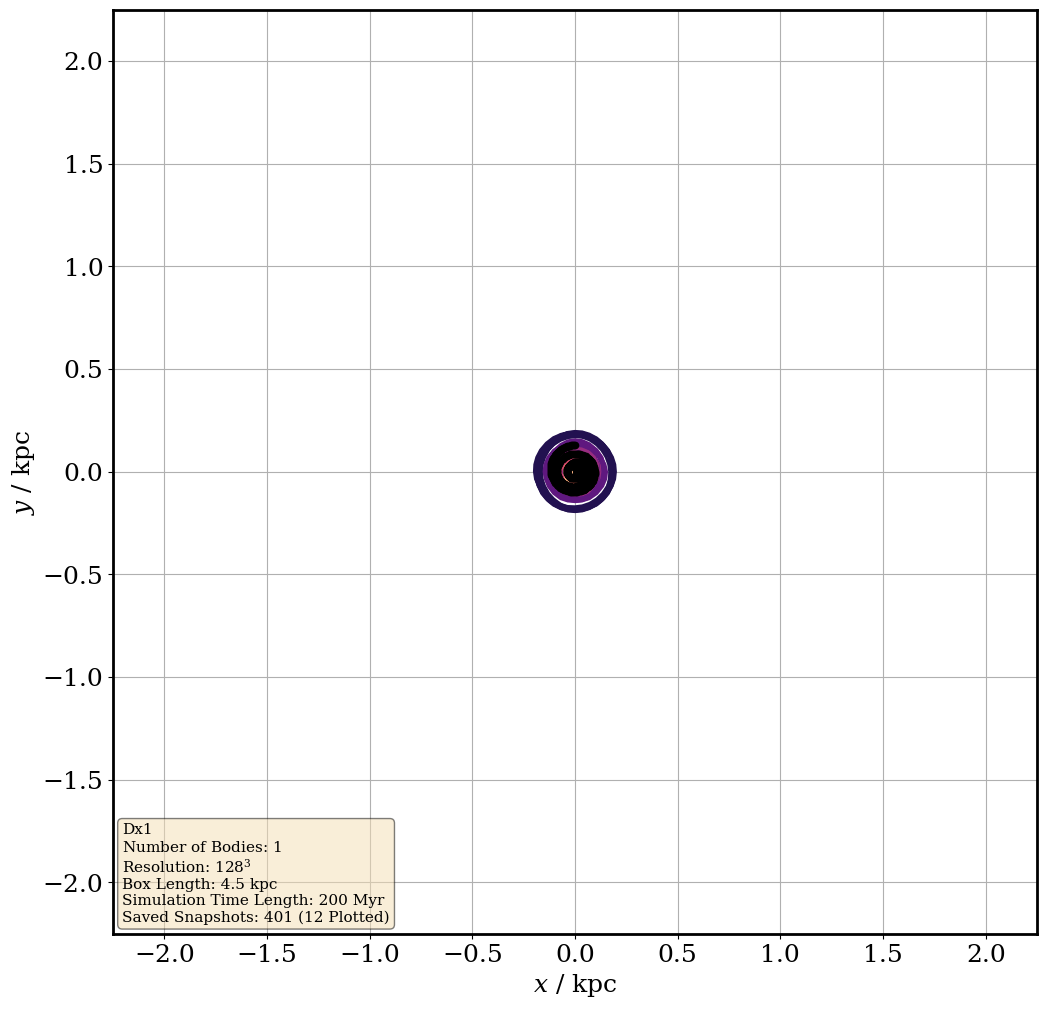

In [267]:
Zoom2D = 1

Plot_ULD = True
# Number of ULDM Slices BETWEEN start and end (those two are always plotted).
NSlices = EndNum // 40


if NSlices >= EndNum:

    NSlices = EndNum

try:
    TSD = TimeStamp
except NameError:
    TimeStamp = 'Debug'

plt.clf()

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111)

Boundary = lengthKpc / (2 * Zoom2D)

plt.xlim([-Boundary, Boundary])
plt.ylim([-Boundary, Boundary])

ax.set_aspect('equal', adjustable='box')

TMx = TMDataS[:, 1::6]
TMy = TMDataS[:, 0::6]

UCx = UCDataS[:, 1]
UCy = UCDataS[:, 0]


if Plot_ULD:

    planemax = np.max(data)
    planemin = np.min(data)

    levels = np.linspace(planemin, planemax, int(resol / 16))

    PlotRange = np.linspace(-lengthKpc / 2,
                            lengthKpc / 2,
                            resol,
                            endpoint=False)

    plt.contour(PlotRange, PlotRange, data[1], levels=levels, cmap=Palette)
    plt.contour(PlotRange,
                PlotRange,
                data[EndNum - 1],
                levels=levels,
                cmap=Palette)

    if NSlices != 0 and EndNum >= NSlices:

        Blink = EndNum / (NSlices + 1)

        Index = np.linspace(Blink, EndNum - Blink, NSlices)

        for Ind in Index:
            j = int(Ind)
            plt.contour(PlotRange,
                        PlotRange,
                        data[j],
                        levels=levels,
                        cmap=Palette)

ax.grid(True)
plt.scatter([TMx], [TMy],zorder = 100, c = 'black', s = 20)
plt.scatter([UCx], [UCy],zorder = 10, c = 'black', s = 1)

Info = '\n'.join(
    (TimeStamp, r'Number of Bodies: $%.0f$' % (NBo, ),
     r'Resolution: $%.0f^3$' % (resol, ), r'Box Length: %.3g kpc' %
     (lengthKpc, ), r'Simulation Time Length: %.3g Myr' % (durationMyr, ),
     r'Saved Snapshots: %.0f (%.0f Plotted)' % (EndNum, NSlices + 2)))

# these are matplotlib.patch.Patch properties
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

# place a text box in bottom left in axes coords
ax.text(0.01,
        0.01,
        Info,
        transform=ax.transAxes,
        fontsize=11,
        verticalalignment='bottom',
        bbox=props)

if Zoom2D != 1:

    props2 = dict(boxstyle='round', facecolor='lightgreen', alpha=0.5)

    Zinfo = f"Zoom Level: {Zoom2D}x"
    ax.text(0.82,
            0.95,
            Zinfo,
            transform=ax.transAxes,
            fontsize=12,
            verticalalignment='bottom',
            bbox=props2)

ax.set_ylabel('$y$ / kpc')
ax.set_xlabel('$x$ / kpc')

TrajName = '{}{}{}{}{}'.format("./", save_path, "/_", TimeStamp, '.jpg')
plt.savefig(TrajName, format='jpg', dpi=72)

plt.show()

## Energy

PyUL.NBoE: The Plummer Radius is 0.0176(kpc)
PyUL.NBoE: Reconstructing Potential and Kinetic Energies for 1 stored objects.
Dx1
Number of Bodies: $1$


<Figure size 640x480 with 0 Axes>

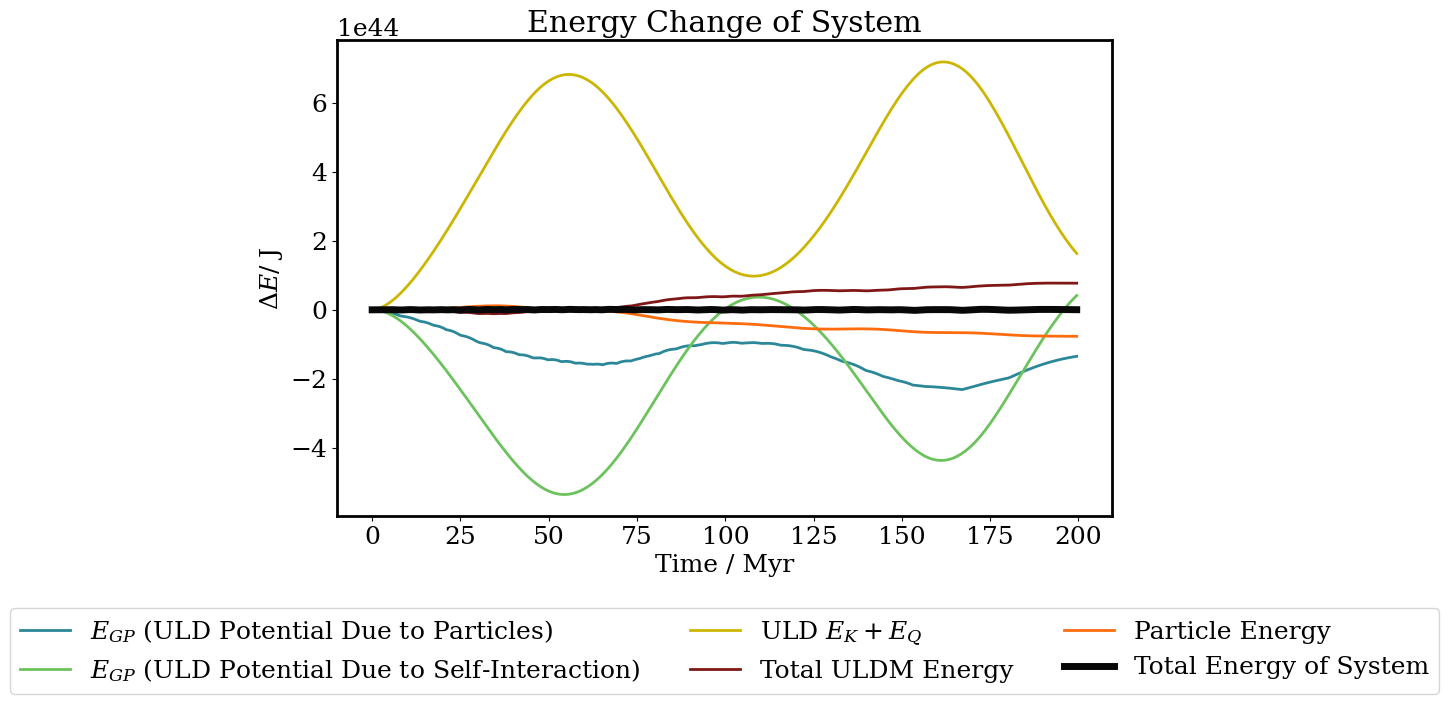

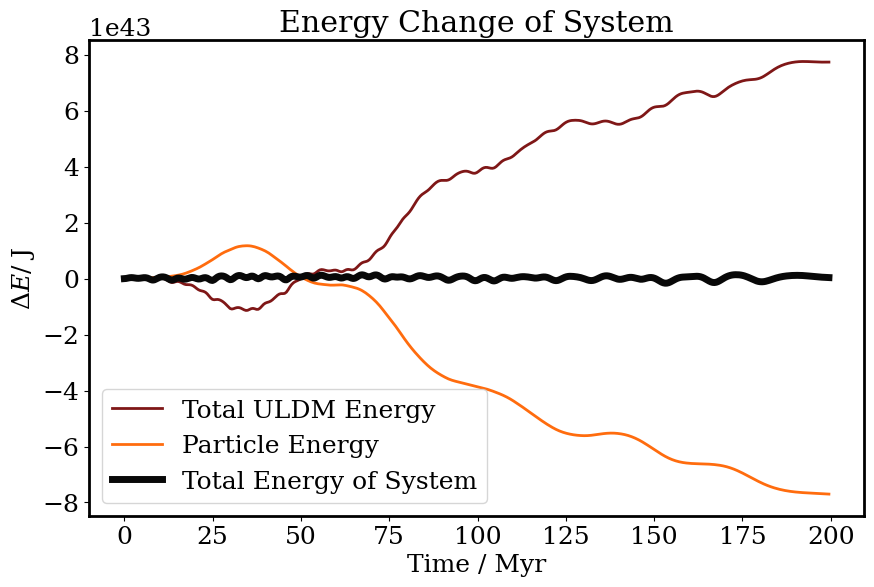

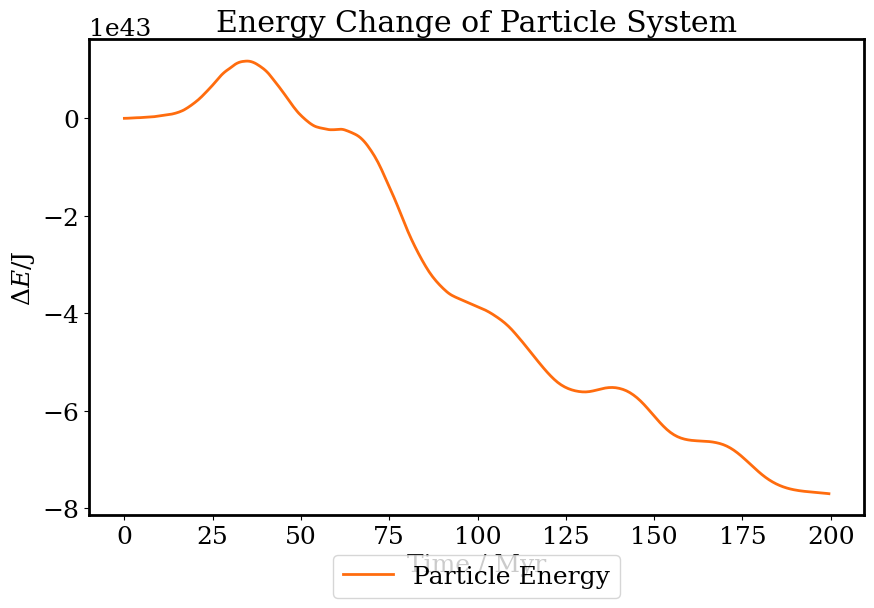

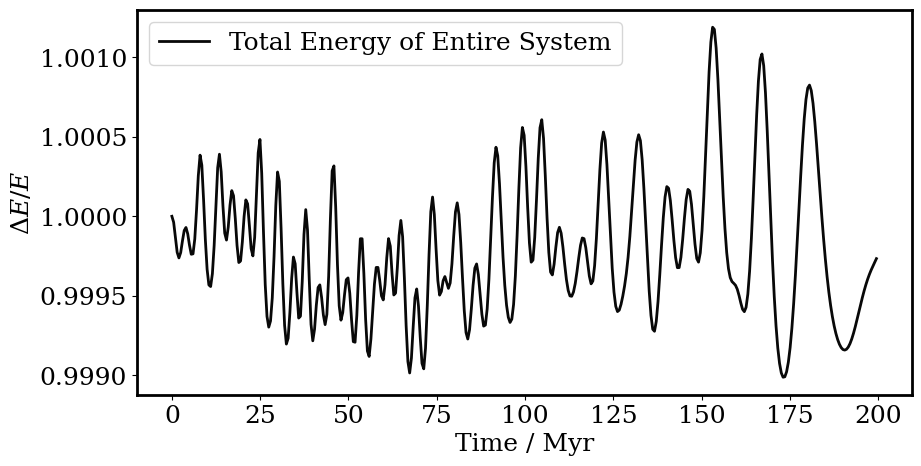

In [166]:
Relative = False  # For Dynamical Friction Cases Only

EFigSize = (10, 6.18)
EFigSize_Mono = (10, 5)

Snap = False
loc = save_path + '/' + run_folder

plt.clf()

#==================================================================================================
## Naming
EnergyName = '{}{}{}'.format("./", loc, "/Energy_Total.jpg")
EnergyNName = '{}{}{}'.format("./", loc, "/Energy_NBody.jpg")
EnergyUName = '{}{}{}'.format("./", loc, "/Energy_UP.jpg")
EnergyDName = '{}{}{}'.format("./", loc, "/Energy_Delta.jpg")
EnergyMName = '{}{}{}'.format("./", loc, "/Energy_Mech.jpg")
EnergyD2Name = '{}{}{}'.format("./", loc, "/Energy_Pct.jpg")

#==================================================================================================
## Analysis
#
# Raw ULDM Energy

# Total Energy from Integrator
egylist = np.load('{}{}'.format(loc, '/Outputs/egylist.npy'),
                  allow_pickle=True) * EPre

# Energy Due to N Body Potential
egpcmlist = np.load('{}{}'.format(loc, '/Outputs/egpcmMlist.npy'),
                    allow_pickle=True) * EPre  # NEW
egpcmlist2 = np.load('{}{}'.format(loc, '/Outputs/egpcmlist.npy'),
                     allow_pickle=True) * EPre  # OLD

# Energy Due to ULDM Self-Interaction
egpsilist = np.load('{}{}'.format(loc, '/Outputs/egpsilist.npy'),
                    allow_pickle=True) * EPre

# Energy Due to Quantum Stuff
ekandqlist = np.load('{}{}'.format(loc, '/Outputs/ekandqlist.npy'),
                     allow_pickle=True) * EPre

mtotlist = np.load('{}{}'.format(loc, '/Outputs/masseslist.npy'),
                   allow_pickle=True) * EPre

# Uniform Correction Performed in Integrator!

# Reconstruct NBody Energy (Real)
NBo, KS, PS = PyUL.NBodyEnergy(MassListSI, TMDataSI, EndNum, a, length_units)

# Reconstruct NBody Energy (Physical)
# NBo, KS, PS = PyUL.NBodyEnergy(MassListSI,TMDataSI,EndNum)

if Relative:
    K0 = KS[0]  #  Need attention
    EUnit = '$E_k(0)$'

    if UVel != [0, 0, 0]:

        VRelSI = CB(np.linalg.norm(UVel), s_velocity_unit, 'm/s', 'v')

        printU(f'Initial Relative Speed is {VRelSI:.3f} m/s', 'QW')

        K0 = 1 / 2 * MassListSI[0] * (VRelSI)**2

else:
    K0 = 1
    EUnit = 'J'
# Processed ULDM Energy

MES = (PS + KS)
MESD = PyUL.GetRel(MES) / K0

EKQD = PyUL.GetRel(ekandqlist) / K0
EGPD = PyUL.GetRel(egpsilist) / K0

ECMD = PyUL.GetRel(egpcmlist) / K0
ECOD = PyUL.GetRel(egpcmlist2) / K0

KSD = PyUL.GetRel(KS) / K0
PSD = PyUL.GetRel(PS) / K0

EUOld = egylist
EUOldD = PyUL.GetRel(EUOld) / K0

EUNew = egpsilist + ekandqlist + egpcmlist2
EUNewD = PyUL.GetRel(EUNew) / K0

ETOld = EUOld + MES
ETOldD = PyUL.GetRel(ETOld) / K0

ETNew = EUNew + MES
ETNewD = PyUL.GetRel(ETNew) / K0

EROld = ETOld / ETOld[0]

ERNew = ETNew / ETNew[0]

#==================================================================================================
## Compile Printing Boxes

SimInfo = '\n'.join((TimeStamp, r'Resolution: $%.0f^3$' % (resol, ),
                     r'Box Length: %.3f kpc' % (lengthKpc, ),
                     r'Simulation Time Length: %.3f Myr' % (durationMyr, )))

NBodyInfo = '\n'.join((
    TimeStamp,
    r'Number of Bodies: $%.0f$' % (NBo, ),
))

print(NBodyInfo)

##==================================================================================================
### Plots
#==================================================================================================
# Energy Change Diagram
fig = plt.figure(figsize=EFigSize)
ax = fig.add_subplot(111)

ax.plot(Tp,
        ECMD,
        EUStyle,
        color=EGColor,
        label='$E_{GP}$ (ULD Potential Due to Particles)')
ax.plot(Tp,
        EGPD,
        EUStyle,
        color=ERColor,
        label='$E_{GP}$ (ULD Potential Due to Self-Interaction)')
ax.plot(Tp, EKQD, EUStyle, color=EQColor, label='ULD $E_{K}+E_{Q}$')

ax.plot(Tp, EUNewD, ETStyle, color=EUColor, label='Total ULDM Energy')

if len(particles) >= 2:
    ax.plot(Tp, KSD, ENStyle, color=EKColor, label='$\sum E_k$ of Particles')
    ax.plot(Tp, PSD, ENStyle, color=EPColor, label='$\sum E_p$ of Particles')
    ax.plot(Tp,
            MESD,
            ETStyle,
            color=ENColor,
            label='Total Mechanical Energy of Particles')
else:
    ax.plot(Tp, KSD, ENStyle, color=ENColor, label='Particle Energy')
ax.plot(Tp,
        ETNewD,
        ETStyle,
        color=ETColor,
        label='Total Energy of System',
        lw=5)
ax.set_ylabel(f'$ΔE / $ {EUnit}')

ax.legend(ncol=3, bbox_to_anchor=(0.5, -0.4), loc='lower center')

plt.xlabel('Time / Myr')
plt.title('Energy Change of System')
plt.savefig(EnergyName, format='jpg', dpi=72)

plt.show()

#==================================================================================================
# Energy Change Diagram Distilled
fig = plt.figure(figsize=EFigSize)
ax = fig.add_subplot(111)

ax.plot(Tp, EUNewD, ETStyle, color=EUColor, label='Total ULDM Energy')

if len(particles) >= 2:
    ax.plot(Tp, KSD, ENStyle, color=EKColor, label='$\sum E_k$ of Particles')
    ax.plot(Tp, PSD, ENStyle, color=EPColor, label='$\sum E_p$ of Particles')
    ax.plot(Tp,
            MESD,
            ETStyle,
            color=ENColor,
            label='Total Mechanical Energy of Particles')
else:
    ax.plot(Tp, KSD, ENStyle, color=ENColor, label='Particle Energy')
ax.plot(Tp,
        ETNewD,
        ETStyle,
        color=ETColor,
        label='Total Energy of System',
        lw=5)
ax.set_ylabel(f'$ΔE / $ {EUnit}')

ax.legend(ncol=3, bbox_to_anchor=(0.5, -0.5), loc='lower center')
ax.legend(loc='lower left')

plt.xlabel('Time / Myr')

plt.title('Energy Change of System')
plt.savefig(EnergyDName, format='jpg', dpi=72)

plt.show()

#==================================================================================================
# Energy Change Diagram Distilled Further
fig = plt.figure(figsize=EFigSize)
ax = fig.add_subplot(111)

if len(particles) >= 2:
    ax.plot(Tp, KSD, ENStyle, color=EKColor, label='$\sum E_k$ of Particles')
    ax.plot(Tp, PSD, ENStyle, color=EPColor, label='$\sum E_p$ of Particles')
    ax.plot(Tp,
            MESD,
            ETStyle,
            color=ENColor,
            label='Total Mechanical Energy of Particles')
else:
    ax.plot(Tp, KSD, ENStyle, color=ENColor, label='Particle Energy')

ax.set_ylabel(f'$ΔE / ${EUnit}')

# ax.plot(Tp, - egpcmlist + egpcmlist[0] ,label = 'ULDM Potential Experienced by Particle')
# ax.plot(Tp, - egpcmlist2 + egpcmlist2[0],label = 'NBody Potential Experienced by ULDM')

ax.legend(ncol=3, bbox_to_anchor=(0.5, -0.2), loc='lower center')

plt.xlabel('Time / Myr')

plt.title('Energy Change of Particle System')
plt.savefig(EnergyNName, format='jpg', dpi=72)

plt.show()
#==================================================================================================
# The Advanced Energy Change Ratio Diagram
fig = plt.figure(figsize=EFigSize_Mono)
ax = fig.add_subplot(111)
#InfoBoxD = AnchoredText(SimInfo, loc=3)
#ax.add_artist(InfoBoxD)

ax.plot(Tp,
        ERNew,
        ETStyle,
        color=ETColor,
        label='Total Energy of Entire System')
ax.set_xlabel('Time / Myr')
ax.legend()

ax.set_ylabel('$ΔE/E$')

plt.savefig(EnergyD2Name, format='jpg', dpi=72)

plt.show()

##==================================================================================================
## The Advanced Energy Change Ratio Diagram 2
#fig = plt.figure(figsize= EFigSize_Mono)
#ax = fig.add_subplot(111)
#
#ax.plot(Tp,TotalER2,ETStyle, color = ETColor, label = 'Total Energy of Entire System')
#ax.set_xlabel('Time / Myr')
#ax.legend()
#
#ax.set_ylabel('Relative Energy Change (%)')
##ax.set_ylim([90.0,110.0])
#ax.set_title('Percentage Change of System Energy (NEW)')
#
#plt.show()
#
#=================================================================================================

### Resampled 3 Density Animation (Redux May 2023)

In [167]:
# NOT CARRIED OVER AUTOMATICALLY. MAKE SURE THEY ARE THE SAME AS USED FOR PyUL.evolve()

resolR = 64 # Or the shape of 3WfnRS.

length_ratio = 0.5 # Size of the new set of boxes.

[○○○○○○○○○○○○○○○○○○○○] 100%     Exp. Time: 31/05/2023, 14:19:27 (Prev.: 0.03s) 


[●●●●●●●●●●◎●●●●●●●●●] 0%     Exp. Time: 31/05/2023, 14:19:38 (Prev.: 0.03s) 

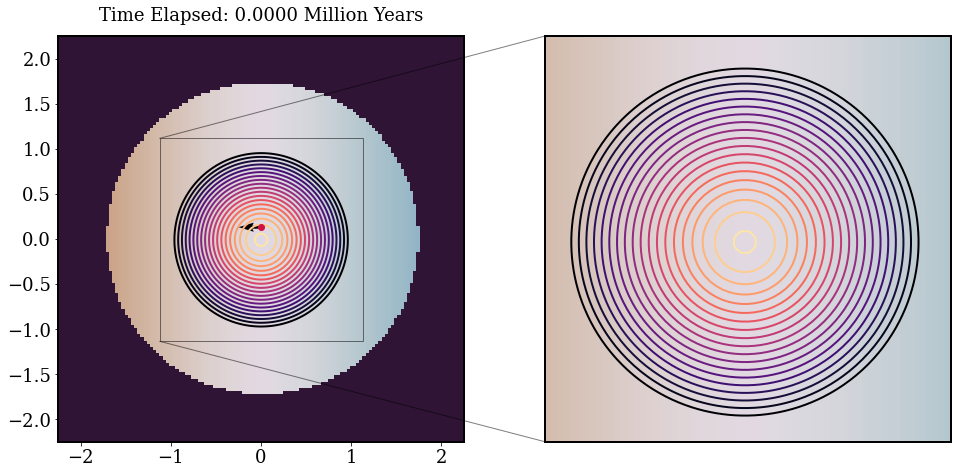

In [168]:
# User Inputs

Loga = True  # Logarithmic Density
MinLoga = 0  # Cut off for minimum value is exp(MinLoga)
Phase = True  # Plot Phase
NLvl = 20  # Number of contour levels

AnimName = f'{loc}/AnimComplexRS_{run_folder}.mp4'

# Data Bounds

if Loga:
    data0 = np.log(np.real(data))
    planemax = np.max(data0)
    planemin = MinLoga

else:
    data0 = np.real(data)
    planemax = np.max(data0)
    planemin = np.min(data0)

# Define Everything Else

fig0, [ax0, ax1] = plt.subplots(figsize=(16,9), dpi=DPI, nrows=1, ncols=2)
ax0.set_aspect('equal')
ax1.set_aspect('equal')

lengthKpcR = lengthKpc * length_ratio

PlotRange = np.linspace(-lengthKpc / 2, lengthKpc / 2, resol, endpoint=False)
PlotRangeR = np.linspace(-lengthKpcR / 2,
                         lengthKpcR / 2,
                         resolR,
                         endpoint=False)

## The other set of axis is modified on the fly.

levels = np.linspace(planemin, planemax, NLvl)

# Frame Number Management
if FrameCap > 0 and FrameCap < EndNum:
    Step = EndNum // FrameCap
    MovEnd = FrameCap
else:
    Step = 1
    MovEnd = EndNum


def animate3RS(i):
    I = Step * i
    ts = time.time()

    ax0.cla()
    ax1.cla()

    ax0.set_aspect('equal')
    #ax0.get_xaxis().set_ticks([])
    #ax0.get_yaxis().set_ticks([])

    ax1.set_aspect('equal')
    ax1.get_xaxis().set_ticks([])
    ax1.get_yaxis().set_ticks([])

    ax0.set_xlim([-lengthKpc / 2, lengthKpc / 2])
    ax0.set_ylim([-lengthKpc / 2, lengthKpc / 2])
    
    XOffset = UCDataS[I,1]
    YOffset = UCDataS[I,0]

    ax1.set_xlim([-lengthKpcR / 2 + XOffset, lengthKpcR / 2 + XOffset])
    ax1.set_ylim([-lengthKpcR / 2 + YOffset, lengthKpcR / 2 + YOffset])

    # Handle 3WfnRS Files

    file = np.load(f"./{loc}/Outputs/3WfnRS/P3R_#{I:03d}.npy")
    fileslice = file[:,:,resolR // 2]

    DensityRS = np.abs(fileslice)**2
    if Loga:
        DensityRS = np.log(DensityRS)
    PhaseRS = np.angle(fileslice)

    if Phase:
        Plane = np.real(phasedata[I])
        ax0.imshow(Plane,
                   cmap=CycPalette,
                   origin='lower',
                   vmin=-np.pi,
                   vmax=np.pi,
                   extent=(-lengthKpc / 2, lengthKpc / 2, -lengthKpc / 2,
                           lengthKpc / 2),
                   interpolation='none')

        ax1.imshow(PhaseRS,
                   cmap=CycPalette,
                   origin='lower',
                   vmin=-np.pi,
                   vmax=np.pi,
                   extent=(-lengthKpcR / 2 + XOffset, lengthKpcR / 2 + XOffset,
                           -lengthKpcR / 2 + YOffset,
                           lengthKpcR / 2 + YOffset),
                   interpolation='none')

    TMStateLoc = TMDataS[I, :]

    ax0.contour(PlotRange, PlotRange, data0[I], levels=levels, cmap=Palette)
    ax1.contour(PlotRangeR + XOffset, PlotRangeR + YOffset, DensityRS, levels=levels, cmap=Palette)

    for particleID in range(len(particles)):

        Color = Colors[np.mod(particleID, 5)]  # 0, 0.5

        TMx = TMStateLoc[int(6 * particleID + 1)]
        TMy = TMStateLoc[int(6 * particleID)]
        TMz = TMStateLoc[int(6 * particleID + 2)]

        Vx = TMStateLoc[int(6 * particleID + 4)]
        Vy = TMStateLoc[int(6 * particleID + 3)]
        Vz = TMStateLoc[int(6 * particleID + 5)]
        ax0.plot([TMx], [TMy], 'o', color=(Color[0], Color[1], Color[2], 1))
        ax0.quiver([TMx],[TMy],[Vx],[Vy])


    ax0.text(0.5,
             1.05,
             '{}{:.4f}{}'.format('Time Elapsed: ', Tp[I], ' Million Years'),
             horizontalalignment='center',
             verticalalignment='center',
             transform=ax0.transAxes,
             color=EmphColor)

    ax0.indicate_inset_zoom(ax1, edgecolor="black")
    PyUL.prog_bar(MovEnd, i + 1, time.time() - ts)


ani3RS = matplotlib.animation.FuncAnimation(fig0,
                                            animate3RS,
                                            MovEnd,
                                            interval=0.001,
                                            blit=False)

Writer = matplotlib.animation.writers['ffmpeg']

writer = Writer(fps=FPS, metadata=dict(artist='PyUltraLightF'))

ani3RS.save(AnimName, writer=writer)

Video(AnimName)

## Experimental Variant: Phase in Colour, Density in Opacity

In [294]:
# User Inputs

Loga = True  # Logarithmic Density
MinLoga = 0  # Cut off for minimum value is exp(MinLoga)
NLvl = 20  # Number of contour levels

AnimName = f'{loc}/AnimComplexRS_{run_folder}.mp4'

# Data Bounds

if Loga:
    data0 = np.log(np.real(data))
    planemax = np.max(data0)
    planemin = MinLoga

else:
    data0 = np.real(data)
    planemax = np.max(data0)
    planemin = np.min(data0)

# Define Everything Else

fig0, [ax0, ax1] = plt.subplots(figsize=(16, 9), dpi=DPI, nrows=1, ncols=2)
ax0.set_aspect('equal')
ax1.set_aspect('equal')

lengthKpcR = lengthKpc * length_ratio

PlotRange = np.linspace(-lengthKpc / 2, lengthKpc / 2, resol, endpoint=False)
PlotRangeR = np.linspace(-lengthKpcR / 2,
                         lengthKpcR / 2,
                         resolR,
                         endpoint=False)

## The other set of axis is modified on the fly.

levels = np.linspace(planemin, planemax, NLvl)

# Frame Number Management
if FrameCap > 0 and FrameCap < EndNum:
    Step = EndNum // FrameCap
    MovEnd = FrameCap
else:
    Step = 1
    MovEnd = EndNum


def animate3RS(i):
    I = Step * i
    ts = time.time()

    ax0.cla()
    ax1.cla()

    ax0.set_aspect('equal')
    #ax0.get_xaxis().set_ticks([])
    #ax0.get_yaxis().set_ticks([])

    ax1.set_aspect('equal')
    ax1.get_xaxis().set_ticks([])
    ax1.get_yaxis().set_ticks([])

    ax0.set_xlim([-lengthKpc / 2, lengthKpc / 2])
    ax0.set_ylim([-lengthKpc / 2, lengthKpc / 2])

    XOffset = UCDataS[I, 1]
    YOffset = UCDataS[I, 0]

    ax1.set_xlim([-lengthKpcR / 2 + XOffset, lengthKpcR / 2 + XOffset])
    ax1.set_ylim([-lengthKpcR / 2 + YOffset, lengthKpcR / 2 + YOffset])

    # Handle 3WfnRS Files

    file = np.load(f"./{loc}/Outputs/3WfnRS/P3R_#{I:03d}.npy")
    fileslice = file[:, :, resolR // 2]

    DensityRS = np.abs(fileslice)**2
    if Loga:
        DensityRS = np.log(DensityRS)

    # No correction for now
    PhaseRS = np.angle(fileslice) + np.pi

    Plane = np.real(phasedata[I]) + np.pi

    #Clamp
    
    nD = data0[I]
    nDR = DensityRS
    
    nD[nD < planemin] = planemin
    nDR[nDR < planemin] = planemin
        
    nD = (nD - planemin) / (planemax - planemin)
    nDR = (nDR - planemin) / (planemax - planemin)
    


    # Create a colormap representing the angle
    cmap = plt.cm.hsv

    color = cmap(Plane / (2 * np.pi))

    rgba = np.zeros((resol, resol, 4))
    rgba[:, :, :3] = color[:, :, :3]
    rgba[:, :, 3] = nD

    coloR = cmap(PhaseRS / (2 * np.pi))

    rgbaR = np.zeros((resolR, resolR, 4))
    rgbaR[:, :, :3] = coloR[:, :, :3]
    rgbaR[:, :, 3] = nDR

    ax0.imshow(rgba,
               origin='lower',
               extent=(-lengthKpc / 2, lengthKpc / 2, -lengthKpc / 2,
                       lengthKpc / 2),
               interpolation='none')

    ax1.imshow(rgbaR,
               origin='lower',
               extent=(-lengthKpcR / 2 + XOffset, lengthKpcR / 2 + XOffset,
                       -lengthKpcR / 2 + YOffset, lengthKpcR / 2 + YOffset),
               interpolation='none')

    TMStateLoc = TMDataS[I, :]

    for particleID in range(len(particles)):

        Color = Colors[np.mod(particleID, 5)]  # 0, 0.5

        TMx = TMStateLoc[int(6 * particleID + 1)]
        TMy = TMStateLoc[int(6 * particleID)]
        TMz = TMStateLoc[int(6 * particleID + 2)]

        Vx = TMStateLoc[int(6 * particleID + 4)]
        Vy = TMStateLoc[int(6 * particleID + 3)]
        Vz = TMStateLoc[int(6 * particleID + 5)]
        ax0.plot([TMx], [TMy], 'o', color=(Color[0], Color[1], Color[2], 1))
        ax0.quiver([TMx], [TMy], [Vx], [Vy])
        
        
        ax1.plot([TMx - XOffset], [TMy - YOffset], 'o', color=(Color[0], Color[1], Color[2], 1))
        ax1.quiver([TMx - XOffset], [TMy - YOffset], [Vx], [Vy])

    ax0.text(0.5,
             1.05,
             '{}{:.4f}{}'.format('Time Elapsed: ', Tp[I], ' Million Years'),
             horizontalalignment='center',
             verticalalignment='center',
             transform=ax0.transAxes,
             color=EmphColor)

    ax0.indicate_inset_zoom(ax1, edgecolor="black")
    PyUL.prog_bar(MovEnd, i + 1, time.time() - ts)


ani3RS = matplotlib.animation.FuncAnimation(fig0,
                                            animate3RS,
                                            MovEnd,
                                            interval=0.001,
                                            blit=False)

Writer = matplotlib.animation.writers['ffmpeg']

writer = Writer(fps=FPS, metadata=dict(artist='PyUltraLightF'))

ani3RS.save(AnimName, writer=writer)

Video(AnimName)

[○○○○○○○○○○○○○○○○○○○○] 100%     Exp. Time: 31/05/2023, 15:41:53 (Prev.: 0.02s) 

## 2D Complex Field Animation (old)

In [205]:
Loga = True  # Logarithmic Density
MinLoga = 2  # Cut off for minimum value is exp(MinLoga)
Relative = False  # With respect to the "Density" value
Phase = False  # Plot Phase
NLvl = 60  # Number of contour levels

try:
    VTimeStamp = TimeStamp
except NameError:
    VTimeStamp = str('Debug')

DensityGR = Density

loc = save_path + '/' + TimeStamp

AnimName = '{}{}{}{}'.format(loc, "/AnimComplex_", VTimeStamp, ".mp4")

if Loga:

    if Relative:
        data0 = np.log(np.real(data) / DensityGR)
        print("Evaluating Change Ratio.")
        planemax = np.max(data0)
        planemin = np.min(data0)
        TITLETEXT = 'Logarithmic Over (Under) density in Plane'

    else:
        data0 = np.log(np.real(data))
        planemax = np.max(data0)
        planemin = MinLoga
        TITLETEXT = 'Logarithmic Mass Density in Plane'

    print("Using Log Plot, the Contour Level Limits Are")

else:
    if Relative:
        data0 = np.real(data) / DensityGR
        print("Initial Field is Uniform. Evaluating Change Ratio.")
        planemax = np.max(data0)
        planemin = np.min(data0)
        TITLETEXT = 'Over (Under) Density in Plane'

    else:
        data0 = np.real(data)
        planemax = np.max(data0)
        planemin = np.min(data0)
        TITLETEXT = 'Mass Density in Plane'

TITLETEXT = VTimeStamp + ': ' + TITLETEXT

print("Saving ", AnimName)

plot_axis = 'z'  #axis that is set to zero
plt.ioff()
fig0, ax0 = plt.subplots(figsize=VideoSize, dpi=DPI)
ax0.set_aspect('equal')

PlotRange = np.linspace(-lengthKpc / 2, lengthKpc / 2, resol, endpoint=False)

# print(PlotRange)

levels = np.linspace(planemin, planemax, NLvl)

# Frame Number Management
if FrameCap > 0 and FrameCap < EndNum:
    Step = EndNum // FrameCap
    MovEnd = FrameCap
else:
    Step = 1
    MovEnd = EndNum

# With out-of-bounds colors:

norm = mpl.colors.BoundaryNorm(boundaries=levels, ncolors=300)


def animate3(i):
    I = Step * i
    ts = time.time()

    ax0.cla()

    ax0.set_aspect('equal')
    ax0.get_xaxis().set_ticks([])
    ax0.get_yaxis().set_ticks([])

    ax0.set_xlim([-lengthKpc / 2, lengthKpc / 2])
    ax0.set_ylim([-lengthKpc / 2, lengthKpc / 2])

    if Phase:
        Plane = np.real(phasedata[I])
        ax0.imshow(Plane,
                   cmap=CycPalette,
                   origin='lower',
                   vmin=-np.pi,
                   vmax=np.pi,
                   extent=(-lengthKpc / 2, lengthKpc / 2, -lengthKpc / 2,
                           lengthKpc / 2),
                   interpolation='none')

    TMStateLoc = TMDataS[I, :]
    
    ax0.contour(PlotRange, PlotRange, data0[I], levels=levels, cmap=Palette)


    for particleID in range(len(particles)):

        Color = Colors[np.mod(particleID, 5)]  # 0, 0.5

        TMx = TMStateLoc[int(6 * particleID + 1)]
        TMy = TMStateLoc[int(6 * particleID)]
        TMz = TMStateLoc[int(6 * particleID + 2)]

        Vx = TMStateLoc[int(6 * particleID + 4)]
        Vy = TMStateLoc[int(6 * particleID + 3)]
        Vz = TMStateLoc[int(6 * particleID + 5)]
        ax0.plot([TMx], [TMy], 'o', color=(Color[0], Color[1], Color[2], 1))
        #ax0.quiver([TMx],[TMy],[Vx],[Vy])

    

    #ax0.pcolormesh(PlotRange, PlotRange,data0[I],rasterized = True, norm = norm, cmap = DivPalette)

    ax0.text(0.5,
             1.05,
             '{}{:.4f}{}'.format('Time Elapsed: ', Tp[I], ' Million Years'),
             horizontalalignment='center',
             verticalalignment='center',
             transform=ax0.transAxes,
             color=EmphColor)

    ax0.text(0.5,
             -0.05,
             f'{ETNewD[I]:.5f}',
             horizontalalignment='center',
             verticalalignment='center',
             transform=ax0.transAxes,
             color=EmphColor,
             fontsize=15)
    fig0.suptitle('{} {}{}'.format(TITLETEXT, plot_axis, '=0'), fontsize=12)
    PyUL.prog_bar(MovEnd, i + 1, time.time() - ts)


interval = 0.15  #in seconds
ani3 = matplotlib.animation.FuncAnimation(fig0,
                                          animate3,
                                          MovEnd,
                                          interval=interval * 1e+3,
                                          blit=False)

Writer = matplotlib.animation.writers['ffmpeg']

writer = Writer(fps=FPS, metadata=dict(artist='PyUltraLightF'))

ani3.save(AnimName, writer=writer)

Video(AnimName)

Using Log Plot, the Contour Level Limits Are
Saving  Single_Tests/Dx1/AnimComplex_Dx1.mp4
[○○○○○○○○○○○○○○○○○○○○] 100%     Exp. Time: 31/05/2023, 14:49:16 (Prev.: 0.03s) 

### Particle Speed History

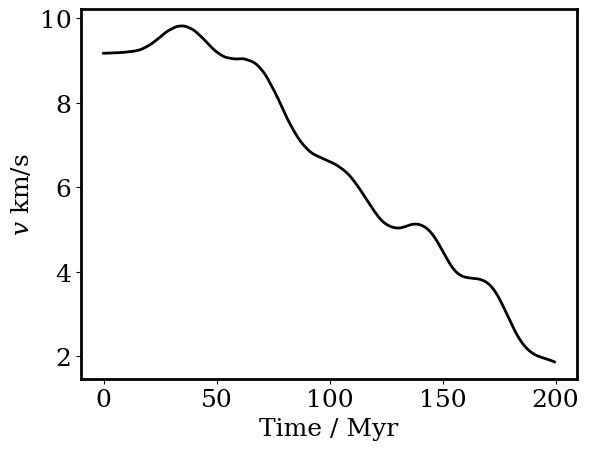

In [208]:
plt.figure()
vS = TMDataS[:, 3:6]

vSMagn = np.sqrt(vS[:, 0]**2 + vS[:, 1]**2 + vS[:, 2]**2)

#plt.plot(Tp,vS, '--')
plt.plot(Tp, vSMagn, ETStyle, color='k', label='Total Speed')

plt.xlabel('Time / Myr')
plt.ylabel(f'$v$ {m_velocity_unit}')

plt.show()

## Linear Momentum (Optional)

Only use if you saved Momentum

In [209]:
pU = []
for p in (pData):
    pU.append(p)

pU = np.array(pU)

pN = pU * 0

print(pN.shape)

for j, M in enumerate(MassListSI):

    pN += TMDataSI[:, 6 * j + 3:6 * j + 6] * M

pTotal = pU + pN
pTotalMagn = np.sqrt(pTotal[:, 0]**2 + pTotal[:, 1]**2 + pTotal[:, 2]**2)
pNMagn = np.sqrt(pN[:, 0]**2 + pN[:, 1]**2 + pN[:, 2]**2)

plt.figure(figsize=EFigSizeMono)
plt.title('ULDM 3-Momentum')
plt.plot(pU)
plt.show()

plt.figure(figsize=EFigSizeMono)
plt.title('Particle 3-Momentum')
plt.plot(pN)
plt.show()

plt.figure(figsize=EFigSizeMono)
plt.title('System 3-Momentum')
plt.plot(pTotal)
plt.show()

plt.figure(figsize=EFigSizeMono)
plt.plot(pTotalMagn)
plt.plot([0], [0])
plt.show()

NameError: name 'pData' is not defined

## Angular Momentum (Optional)

Only use if you saved AngMomentum

In [ ]:
LU = []
for L in (LData):
    LU.append(L)
LU = np.array(LU)

LN = np.zeros([EndNum, 3])

for i, M in enumerate(MassListSI):
    Index = int(i * 6)
    for I in range(EndNum):
        # SIGN FLIP TO ACCOUNT FOR ERROR IN CURRENT INTEGRATOR
        LN[I, :] += -M * np.cross(TMDataSI[I, Index:Index + 3],
                                  TMDataSI[I, Index + 3:Index + 6])
    printU(f'Calculated angular momentum for particle #{i}', 'AngMomentum')

plt.figure(figsize=EFigSizeMono)
plt.plot(LU, 'x-', label='ULDM')
plt.plot(LN, label='Particle')

plt.legend()
plt.show()

plt.figure(figsize=EFigSizeMono)
plt.title('Total Angular Momentum')
LTot = LN + LU

La = ['x', 'y', 'z']

for i in range(3):
    plt.plot(Tp, LTot[:, i], label=La[i])

plt.legend()
LMagn = np.sqrt(LTot[:, 0]**2 + LTot[:, 1]**2 + LTot[:, 2]**2)

#plt.plot(LMagn)
plt.show()

## YT STUFF

In [211]:
import yt

In [210]:
planemin

2

In [212]:
planemax

16.897104248411306

In [213]:
yt.utilities.logger.set_log_level(30)
yt.utilities.logger.disable_stream_logging()

In [215]:
## Resampled 3D Render with YT
datasets = []

for i in range(EndNum):
    file = f"./{loc}/Outputs/3WfnRS/P3R_#{i:03d}.npy"

    Fata = np.abs(np.load(file))**2
    
    ds = yt.load_uniform_grid({"density": Fata}, Fata.shape)
    datasets.append(ds)
    
print("All datasets loaded.")

All datasets loaded.


In [226]:
# Add Points
from yt.visualization.volume_rendering.api import PointSource

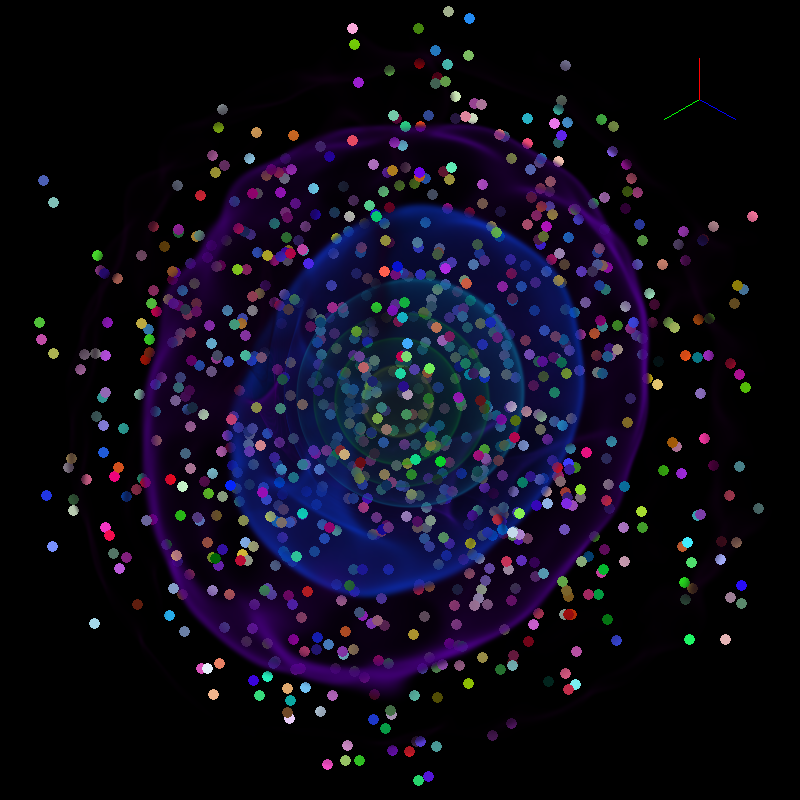

In [235]:
scene = yt.create_scene(datasets[-1], field='density')

source = scene[0]

cam = scene.add_camera(ds, lens_type="plane-parallel")
cam.resolution = [800, 800]

# Set the color transfer function bounds
source.tfh.set_bounds((1e2,1e9))

source.tfh.set_log(True)

source.tfh.grey_opacity = True

scene.annotate_axes()
# scene.annotate_grids(ds)
# scene.annotate_domain(ds, color=[1, 1, 1, 0.01])

np.random.seed(1234567)

npoints = 1000

# Random particle positions
vertices = np.random.random([npoints, 3])

# Random colors
colors = np.random.random([npoints, 4])

# Set alpha value to something that produces a good contrast with the volume
# rendering
colors[:, 3] = 1

points = PointSource(vertices, colors=colors, radii = 5)
scene.add_source(points)

scene.show()



In [297]:
planemax = np.max(data)

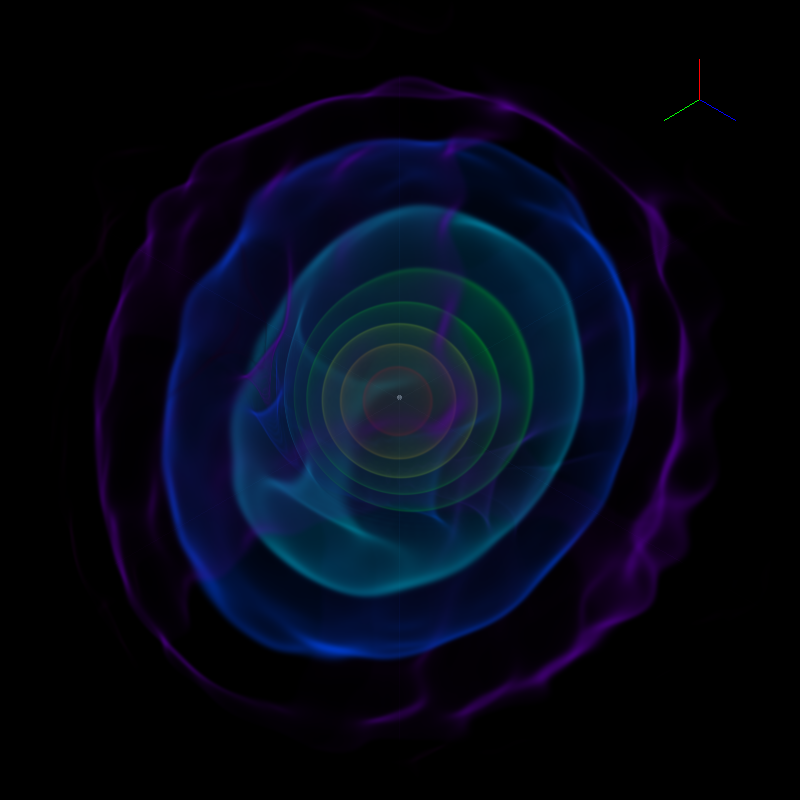

In [298]:
scene = yt.create_scene(datasets[-1], field='density')

# Particle positions

vertices = np.zeros([2,3])
vertices[0,:] = (TMDataS[-1,0:3] + UCDataS[-1])/lengthKpcR

colors = np.zeros([2,4])
colors[0,:] = np.array([1,1,1,0.95])

points = PointSource(vertices, colors, radii = 2)
scene.add_source(points)

source = scene[0]

cam = scene.add_camera(ds, lens_type="plane-parallel")
cam.resolution = [800, 800]

# Set the color transfer function bounds
source.tfh.set_bounds((50,planemax))

source.tfh.set_log(True)

source.tfh.grey_opacity = True

scene.annotate_axes()
scene.annotate_grids(ds)
# scene.annotate_domain(ds, color=[1, 1, 1, 0.01])

scene.show()

In [ ]:
for i, ds in enumerate(datasets):
    
    t0 = time.time()
    # Set the new dataset for the scene

    scene = yt.create_scene(ds, field='density')
    
    vertices = np.zeros([2,3])
    vertices[0,:] = (TMDataS[i,0:3] - UCDataS[i])/lengthKpcR

    colors = np.zeros([2,4])
    colors[0,:] = np.array([1,1,1,0.95])

    points = PointSource(vertices, colors, radii = 2)
    scene.add_source(points)
    
    source = scene[0]

    cam = scene.add_camera(ds, lens_type="plane-parallel")
    cam.resolution = [1080, 1080]

    # Set the color transfer function bounds
    source.tfh.set_bounds((10,planemax))
    source.tfh.set_log(True)
    source.tfh.grey_opacity = False

    scene.annotate_axes()
    scene.annotate_grids(ds)

    # Save the rendered frame to a file (e.g., as PNG or JPEG)
    frame_filename = f"{loc}/YTA/DRS_{i:04d}.png"
    scene.save(frame_filename)
    

    
    PyUL.prog_bar(iteration_number = EndNum, progress = i,tinterval= time.time() - t0)

[●●●●●●●◎●●●●●●●●●●●●] 4%     Exp. Time: 31/05/2023, 16:37:47 (Prev.: 7.84s) 